<a href="https://colab.research.google.com/github/rafi007akhtar/coursera-tensorflow/blob/master/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [0]:
# YOUR CODE SHOULD START HERE

# YOUR CODE SHOULD END HERE

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()


## Step #0: Exploring the dataset (Skippable)

There are 60000 images for training and 60000 for testing
The output labels are 10000 for train and 10000 for test
The following image shown is 3


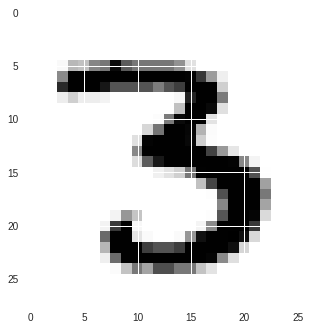

In [3]:
import matplotlib.pyplot as plt

print(f"There are {len(x_train)} images for training and {len(y_train)} for testing")
print(f"The output labels are {len(x_test)} for train and {len(y_test)} for test")

print(f"The following image shown is {y_train[12]}")
plt.imshow(x_train[12])

## Step #1: Normalizing

In [0]:
# YOUR CODE SHOULD START HERE
x_train = x_train / 255.0
x_test = x_test / 255.0
# YOUR CODE SHOULD END HERE

## Step #2: Designing the model

In [5]:
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Colocations handled automatically by placer.


## Step #3: Writing the callback code and training the model

In [6]:
# YOUR CODE SHOULD START HERE
class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('acc') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
# YOUR CODE SHOULD END HERE

Epoch 1/10
60000/60000 [==============================] - 34s 559us/sample - loss: 0.1857 - acc: 0.9444
Epoch 2/10
60000/60000 [==============================] - 33s 554us/sample - loss: 0.0730 - acc: 0.9773
Epoch 3/10
60000/60000 [==============================] - 33s 555us/sample - loss: 0.0485 - acc: 0.9846
Epoch 4/10
60000/60000 [==============================] - 33s 546us/sample - loss: 0.0345 - acc: 0.9892
Epoch 5/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0257 - acc: 0.9920
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 33s 546us/sample - loss: 0.0257 - acc: 0.9920


## Step #4: Testing the model (Skippable)

Skippable because the question did not ask for it, but I did it for the sake of completion.

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 111us/sample - loss: 0.0802 - acc: 0.9777


[0.0801638552308199, 0.9777]

## Results

99.20% train accuracy
97.77% test accuracy